In [113]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np

In [114]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

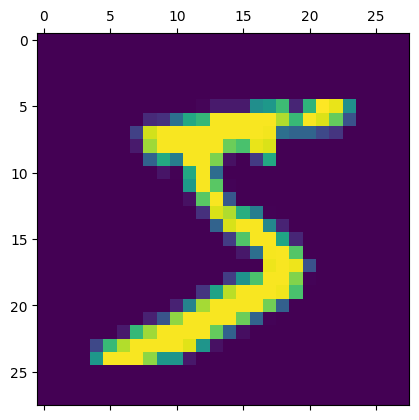

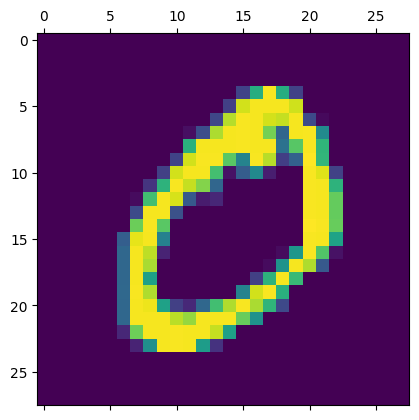

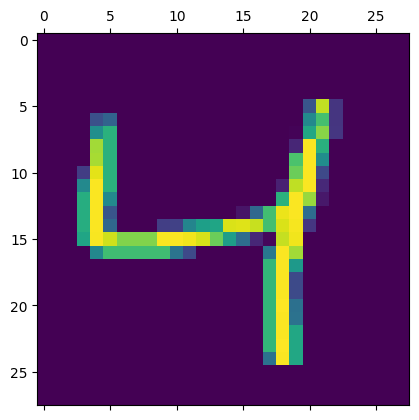

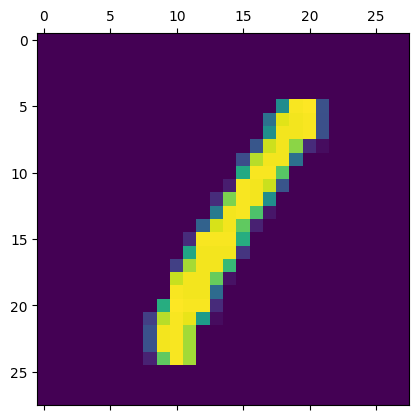

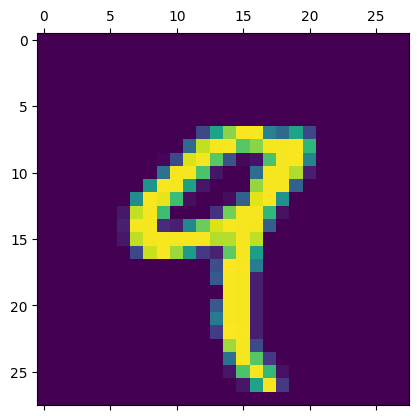

In [115]:
# let's see what's the first 5 values are, 
for i in range(0, 5):
    plt.matshow(X_train[i])

In [116]:
# let's double check first 5 imgage values
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [117]:
X_train.shape

(60000, 28, 28)

In [118]:
X_test.shape

(10000, 28, 28)

In [119]:
# lets scale these values , this will improve accuracy
X_train = X_train/255
X_test = X_test/255

In [120]:
# let's build the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# train the model with trianing data set
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8745 - loss: 0.4329
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9747 - loss: 0.0850
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9815 - loss: 0.0619
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9851 - loss: 0.0502


In [124]:
# evalute the model on test data set 
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0905


[0.07973125576972961, 0.975600004196167]

In [125]:
y_predicted = model.predict(X_test)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.8170780e-03, 9.8646098e-01, 9.9999988e-01, 9.4143248e-01,
       8.0951557e-09, 6.5187585e-01, 3.3001422e-03, 4.9528294e-06,
       7.2539741e-01, 3.2758433e-06], dtype=float32)

In [126]:
np.argmax(y_predicted[1])

2

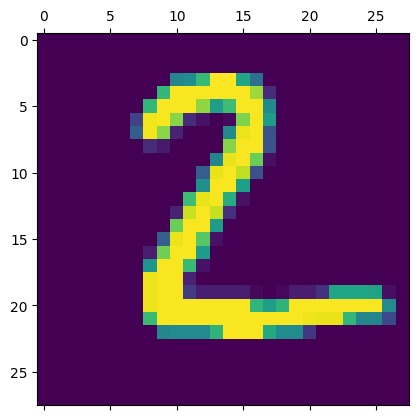

In [127]:
plt.matshow(X_test[1])

In [128]:
np.argmax(y_predicted[0])


7

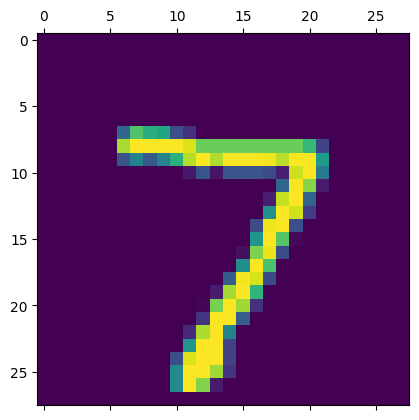

In [129]:
plt.matshow(X_test[0])

In [130]:
# let's build confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [131]:
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    1,    7,    3,    0,    2,    3],
       [   0, 1117,    6,    0,    0,    0,    3,    2,    6,    1],
       [   6,    0, 1006,    4,    3,    0,    1,    6,    6,    0],
       [   0,    0,    5,  977,    1,    9,    0,    6,    4,    8],
       [   0,    0,    4,    0,  954,    0,    3,    3,    2,   16],
       [   2,    0,    0,    4,    0,  876,    2,    0,    5,    3],
       [   3,    3,    1,    1,    6,   12,  929,    0,    3,    0],
       [   1,    2,    6,    3,    0,    0,    0, 1007,    3,    6],
       [   2,    0,    1,    7,    4,    4,    0,    4,  945,    7],
       [   2,    2,    0,    4,    7,    4,    1,    5,    1,  983]],
      dtype=int32)>

In [132]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [133]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]